In [1]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

/Users/zhangmengyan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zhangmengyan/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


```quote
INCREASING HAZARD RATE OF MIXTURES FOR NATURAL EXPONENTIAL FAMILIES
https://www.jstor.org/stable/41714055?seq=1
```
[Block et al. 2005](https://linkinghub.elsevier.com/retrieve/pii/S0167715205001690) shows the case mixture of normal distributions with equal variance; [Liu and Liu 2008](https://linkinghub.elsevier.com/retrieve/pii/S0167715208000692) shows the case mixture of normal distributions with unequal variance (Figure 1);

In short, if |mu1 - mu2| <= 2 sigma, then the mixture is unimodal.
Bimodal requires mu1 and mu2 are far away from each other (i.e. |mu1 - mu2| > 2 sigma for equal variance case), and f(t) = p N(x|mu1, sigma1) + (1-p) N(x|mu2, sigma2) with mu1 < mu2, p needs to be small to have IHR, which is not what we want (we want p to be very big, i.e. big rewards with very small probability ).

However, if we consider absolute normal distribution, [which is not a member of the exponential family](https://arxiv.org/pdf/1402.3559.pdf). It means it's hard to find theoretical support about the IHR wrt mixture absolute normal distributions. Through my empirical test, the trend is the same as the mixture of Gaussian, i.e. p needs to be small.

## Mixture of Gaussian 

f(t) = p N(x|mu1, sigma1) + (1-p) N(x|mu2, sigma2) with mu1 < mu2

### When p is small 

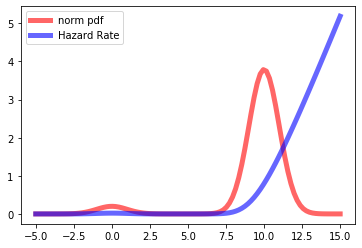

In [82]:
p = 0.05 
mu = 10
sigma = 1

x = np.linspace(-5, 15, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * norm.pdf(x) + (1-p)*norm.pdf(x, mu,sigma)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * norm.pdf(x) + (1-p)*norm.pdf(x, mu,sigma))/(1 - p * norm.cdf(x) - (1-p)*norm.cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

### When p is large

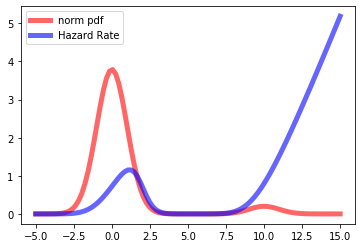

In [89]:
p = 0.95 
mu = 10
sigma = 1

x = np.linspace(-5, 15, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * norm.pdf(x) + (1-p)*norm.pdf(x, mu,sigma)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * norm.pdf(x) + (1-p)*norm.pdf(x, mu,sigma))/(1 - p * norm.cdf(x) - (1-p)*norm.cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

## Mixture of Absolute Gaussian

In [29]:
# absolute normal 

from scipy.special import erf

def pdf(x, mu = 0, sigma = 1):
    return 1.0/np.sqrt(2 * np.pi * sigma ** 2) * (np.exp(- 1.0/(2 * sigma**2) * (x -mu)** 2) + np.exp(- 1.0/(2 * sigma**2) * (x +mu)** 2 ))

def cdf(x, mu = 0, sigma = 1):
    return 1.0/2 * (erf((x-mu)/ np.sqrt(2 * sigma ** 2)) + erf((x+mu)/ np.sqrt(2 * sigma ** 2)))

### When p is small 

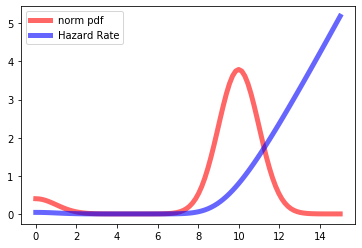

In [85]:
p = 0.05
mu = 10
sigma = 1

x = np.linspace(0, 15, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * pdf(x) + (1-p)*pdf(x, mu,sigma)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * pdf(x) + (1-p)*pdf(x, mu,sigma))/(1 - p * cdf(x) - (1-p)*cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()

### When p is large

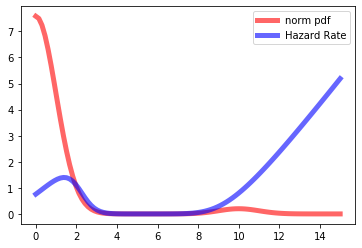

In [86]:
p = 0.95
mu = 10
sigma = 1

x = np.linspace(0, 15, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, 10 * (p * pdf(x) + (1-p)*pdf(x, mu,sigma)),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, (p * pdf(x) + (1-p)*pdf(x, mu,sigma))/(1 - p * cdf(x) - (1-p)*cdf(x, mu,sigma)), 'b-', lw=5, alpha=0.6, label='Hazard Rate')
ax.legend()